# Sentiment Prediction on IMDB 

**The Plan**

Compare `CountVectorizer` to `Doc2Vec` using 2-3 different classifiers models to predict movie review sentiment label. 
- Logistic Regression 
- SVM
- Random Forest


## import packages 

In [1]:
import pandas as pd
from time import time
import sys
sys.path.append("/Users/lesleymi/data_science_tutorials/IMDB_Sentiment_Analysis/src")
import imdb_functions as imdb

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# evaluation 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

## load data 

### train

In [22]:
# load extracted doc2vec vectors 
X_train = pd.read_csv("data/train_d2v.csv").drop(labels='Unnamed: 0', axis=1)
y_train = pd.read_csv('data/Train.csv').label

In [23]:
X_train.head(2)

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_90,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99
0,-0.081147,-0.812462,-0.365505,0.840091,0.028956,0.422929,-0.175895,-0.481343,0.147237,-0.010143,...,0.188548,0.462908,0.117806,-1.013064,-0.433103,-0.031341,-1.231887,0.950093,0.239684,0.937017
1,0.657423,0.345021,0.400715,0.293076,-0.415254,-0.514342,-0.185605,-0.046682,-0.226956,0.254316,...,-0.258261,0.691419,0.196938,0.517854,-0.682640,-0.317824,-0.490037,0.628256,0.138785,1.113321


### validation 

In [24]:
# load d2v vectors for valid set 
X_valid = pd.read_csv("data/valid_d2v.csv").drop(labels='Unnamed: 0', axis=1)
y_valid = pd.read_csv("data/Valid.csv").label

In [25]:
X_valid.head(2)

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_90,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99
0,0.140037,-0.384942,0.017407,-0.283626,-0.519167,0.081174,0.318546,-0.370915,0.081888,-0.612242,...,-0.283497,0.274552,0.374042,-0.747882,-0.106644,-0.088393,-0.643465,0.619472,-0.260349,0.170316
1,-0.076081,-0.052235,-0.573520,0.581987,-0.169022,-0.028190,-0.387456,-0.253191,0.855759,-0.609575,...,-0.244684,-0.036304,0.377817,-0.542965,0.039536,0.020657,-0.504114,0.156678,-0.580269,0.364869


## Doc2Vec Version 1

**Vector Averaging**

The document vectors used in the first iteration of `doc2vec` used the default averaging of the paragraph vector to the context vectors before completing the task 
of predicting the next word in the sequence. 

### Logistic Regression 


#### train set 

In [72]:
start = time()
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
stop = time()
print("training time for logistic regression... {} seconds".format(round(stop - start, 2)))

training time for logistic regression... 0.17 seconds


In [73]:
acc = round(lr.score(X_train, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 86.0 %


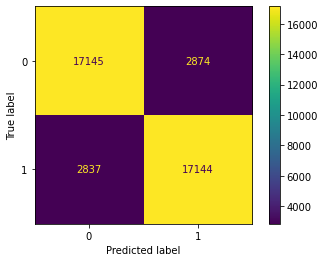

In [74]:
### confusion matrix
plot_confusion_matrix(estimator=lr, X=X_train, y_true=y_train)

In [75]:
# get model predictions 
y_pred = lr.predict(X_train)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
metrics

(array([0.85802222, 0.85642921]),
 array([0.85643639, 0.85801511]),
 array([0.85722857, 0.85722143]),
 array([20019, 19981]))

In [76]:
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.858022,0.856429
recall,0.856436,0.858015
f1_score,0.857229,0.857221
count_of_reviews,20019.000000,19981.000000


#### validation set 

In [77]:
acc = round(lr.score(X_valid, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 86.0 %


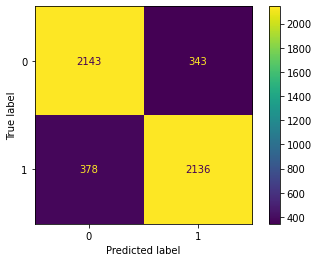

In [78]:
### confusion matrix
plot_confusion_matrix(estimator=lr, X=X_valid, y_true=y_valid)

In [79]:
y_valid_pred = lr.predict(X_valid)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_valid_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.850060,0.861638
recall,0.862027,0.849642
f1_score,0.856002,0.855598
count_of_reviews,2486.000000,2514.000000


#### Summary 
**Logistic regression** 

For **negative** reviews, the precision is 72% meaning that when the classifier predicts the positive label, it correctly identifies the negative review 72% of the time. The recall is much higher at 95%. Out of the truly negative reviews, the classifier correctly identifies them 95% of the time. 

For **positive** reviews, the precision is much higher at ~ 93%. But the recall is much lower at 64% meaning that out of the positive reviews, the classifier correctly identifies that it is positive 64% of the time. 

F1 score for **negative** reviews is 82% and the F1 score for **positive** reviews is ~ 76%. So overall, before any hyperparameter tuning, the `Logistic Regression` model performs better at identifying **negative** reviews. 

### Support Vector Machine 



#### train set 

In [80]:
start = time()
svc = SVC(random_state=0).fit(X_train, y_train)
stop = time()
print("training time for support vector machine: {} seconds.".format(round((stop - start), 2)))

training time for support vector machine: 235.65 seconds.


In [81]:
train_time = round((stop - start)/60, 2)
print('training time for support vector machine: {} minutes.'.format(train_time))

training time for support vector machine: 3.93 minutes.


**Note:**

**The train accuracy score and the plot of the confusion matrix each took a few minutes each to compute! In contrast to logistic regression which was practically instantaneous.**

In [82]:
acc = round(svc.score(X_train, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 92.0 %


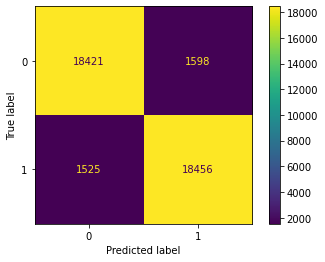

In [83]:
### confusion matrix
plot_confusion_matrix(estimator=svc, X=X_train, y_true=y_train)

In [84]:
# get model predictions 
y_pred = svc.predict(X_train)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.923544,0.920315
recall,0.920176,0.923677
f1_score,0.921857,0.921993
count_of_reviews,20019.000000,19981.000000


#### validation set 

In [85]:
acc = round(svc.score(X_valid, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 86.0 %


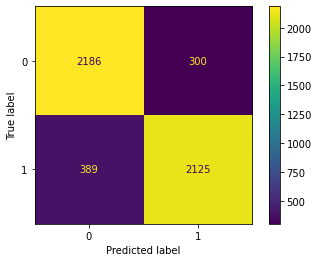

In [86]:
### confusion matrix
plot_confusion_matrix(estimator=svc, X=X_valid, y_true=y_valid)

In [87]:
y_valid_pred = svc.predict(X_valid)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_valid_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.848932,0.876289
recall,0.879324,0.845267
f1_score,0.863861,0.860498
count_of_reviews,2486.000000,2514.000000


#### Summary 

Without any hyperparameter tuning `SVC` performs even better on the train set than `Logistic Regression` but even worse on the validation. There is a big gap in the accuracy between train and validation which indicates overfitting. But this model would probably benefit greatly from tuning. 

For the **Negative** reviews, the `SVC` has worse precision but slightly higher recall. For **Positive** reviews the precision is the same as before but the recall is far far worse (64% for LR vs 47% for SVC). 

SVC is still performing better on negative reviews over positive reviews but it performs worse on the validation set than `Logistic Regression`. However, the model needs a tuning before I'd really be able to compare fairly. 

### Random Forest

#### train set 

In [88]:
start = time()
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
stop = time()
print("training time for random forest: {} seconds.".format(round((stop - start), 2)))

training time for random forest: 28.37 seconds.


In [89]:
acc = round(rf.score(X_train, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 100.0 %


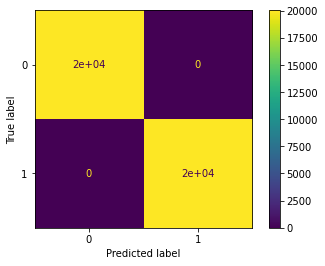

In [90]:
### confusion matrix
plot_confusion_matrix(estimator=rf, X=X_train, y_true=y_train)

In [91]:
# get model predictions 
y_pred = rf.predict(X_train)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,1.0,1.0
recall,1.0,1.0
f1_score,1.0,1.0
count_of_reviews,20019.0,19981.0


#### validation set 

In [92]:
acc = round(rf.score(X_valid, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 80.0 %


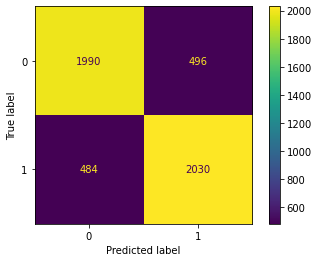

In [93]:
### confusion matrix
plot_confusion_matrix(estimator=rf, X=X_valid, y_true=y_valid)

In [94]:
y_valid_pred = rf.predict(X_valid)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_valid_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.804365,0.803642
recall,0.800483,0.807478
f1_score,0.802419,0.805556
count_of_reviews,2486.000000,2514.000000


#### Summary 
Off the shelf, the `Random Forest` is performing more equally on the **positive** vs **negative** reviews. Overall, it performs slighly better on **positive reviews** than **negative** reviews.

Compared to `SVC` it is performing quite a bit worse in general but again hyperparameter tuning should improve it as currently the `Random Forest` model is severely overfitting.  

## Doc2Vec Version 2 

These doc2vec features were built using the `dm_concat = 1` parameter of the model; meaning that the paragraph vector and context word vectors were concatentated 
together before performing the task of predicting the next word in the sequence. Contentation of the paragraph vector with the context word vectors 
is supposed to yield better performance on the sentiment analysis task. 

### Logistic Regression 


#### train set 

In [17]:
start = time()
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
stop = time()
print("training time for logistic regression... {} seconds".format(round(stop - start, 2)))

training time for logistic regression... 0.1 seconds


In [18]:
acc = round(lr.score(X_train, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 80.0 %


In [19]:
# get model predictions 
y_pred = lr.predict(X_train)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.802689,0.801860
recall,0.802088,0.802462
f1_score,0.802389,0.802161
count_of_reviews,20019.000000,19981.000000


#### validation set 

In [20]:
acc = round(lr.score(X_valid, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 80.0 %


In [21]:
y_valid_pred = lr.predict(X_valid)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_valid_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.811391,0.798215
recall,0.790829,0.818218
f1_score,0.800978,0.808093
count_of_reviews,2486.000000,2514.000000


#### Summary 

## Doc2Vec Version 3

The document features were built using `PV-DBOW` algorithm. 

### Logistic Regression 


#### train set 

In [26]:
start = time()
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
stop = time()
print("training time for logistic regression... {} seconds".format(round(stop - start, 2)))

training time for logistic regression... 0.15 seconds


In [27]:
acc = round(lr.score(X_train, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 87.0 %


In [28]:
# get model predictions 
y_pred = lr.predict(X_train)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.871703,0.872800
recall,0.873270,0.871228
f1_score,0.872486,0.872013
count_of_reviews,20019.000000,19981.000000


#### validation set 

In [29]:
acc = round(lr.score(X_valid, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 87.0 %


In [30]:
y_valid_pred = lr.predict(X_valid)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_valid_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.861635,0.880293
recall,0.881738,0.859984
f1_score,0.871571,0.870020
count_of_reviews,2486.000000,2514.000000


#### Summary 